In [1]:
#importing pandas
import pandas as pd
data = pd.read_csv('fastfood.csv',na_values=['NA','',' ','-'])

In [2]:
#checking if missing values are correctly replaced with NA values 
missing = [' ','-',' ']
data.isin(missing).sum().sum()

np.int64(0)

In [3]:
#checkin NA values
data.isna().sum().sum()

np.int64(228)

In [4]:
#filtering dataset where total_fat is <= 125, making a copy 
data_subset = data.loc[data['total_fat'] <= 125].copy()
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 0 to 514
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   510 non-null    object 
 1   item         513 non-null    object 
 2   calories     513 non-null    int64  
 3   cal_fat      512 non-null    float64
 4   total_fat    513 non-null    int64  
 5   sat_fat      513 non-null    float64
 6   trans_fat    513 non-null    float64
 7   cholesterol  513 non-null    int64  
 8   sodium       513 non-null    int64  
 9   total_carb   513 non-null    int64  
 10  fiber        501 non-null    float64
 11  sugar        513 non-null    int64  
 12  protein      511 non-null    float64
 13  calcium      304 non-null    float64
dtypes: float64(6), int64(6), object(2)
memory usage: 60.1+ KB


In [5]:
print(data_subset.isna().mean()*100)

restaurant      0.584795
item            0.000000
calories        0.000000
cal_fat         0.194932
total_fat       0.000000
sat_fat         0.000000
trans_fat       0.000000
cholesterol     0.000000
sodium          0.000000
total_carb      0.000000
fiber           2.339181
sugar           0.000000
protein         0.389864
calcium        40.740741
dtype: float64


In [6]:
#dropping calcium because it has 40% missing values
#dropping restauranat and item, because they are not relevant inputs for prediction ( type object, and dont make logic sense for prediction so there is no need to encoding into vectors) 
data_subset.drop(columns=['calcium','item','restaurant'],inplace = True)

In [7]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 0 to 514
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   calories     513 non-null    int64  
 1   cal_fat      512 non-null    float64
 2   total_fat    513 non-null    int64  
 3   sat_fat      513 non-null    float64
 4   trans_fat    513 non-null    float64
 5   cholesterol  513 non-null    int64  
 6   sodium       513 non-null    int64  
 7   total_carb   513 non-null    int64  
 8   fiber        501 non-null    float64
 9   sugar        513 non-null    int64  
 10  protein      511 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 48.1 KB


In [8]:
#checking if variables with missing vals have normal distribution
from scipy.stats import shapiro
cols_with_na = ['cal_fat','fiber','protein']
for col in cols_with_na:
    series = data_subset[col].dropna()
    stat , p = shapiro(series)
    print(f"{col}:{p:.5f}")


cal_fat:0.00000
fiber:0.00000
protein:0.00000


In [9]:
# replacing NA values in those cols with median, because p value < 0.05 ( variables dont have normal distribution )  
for col in cols_with_na:
    median = data_subset[col].median()
    data_subset[col] = data_subset[col].fillna(median)
data_subset.isna().sum()

calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
dtype: int64

In [10]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 0 to 514
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   calories     513 non-null    int64  
 1   cal_fat      513 non-null    float64
 2   total_fat    513 non-null    int64  
 3   sat_fat      513 non-null    float64
 4   trans_fat    513 non-null    float64
 5   cholesterol  513 non-null    int64  
 6   sodium       513 non-null    int64  
 7   total_carb   513 non-null    int64  
 8   fiber        513 non-null    float64
 9   sugar        513 non-null    int64  
 10  protein      513 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 48.1 KB


In [11]:
#creating a copy of numeric dataset 
data_numeric = data_subset.copy()

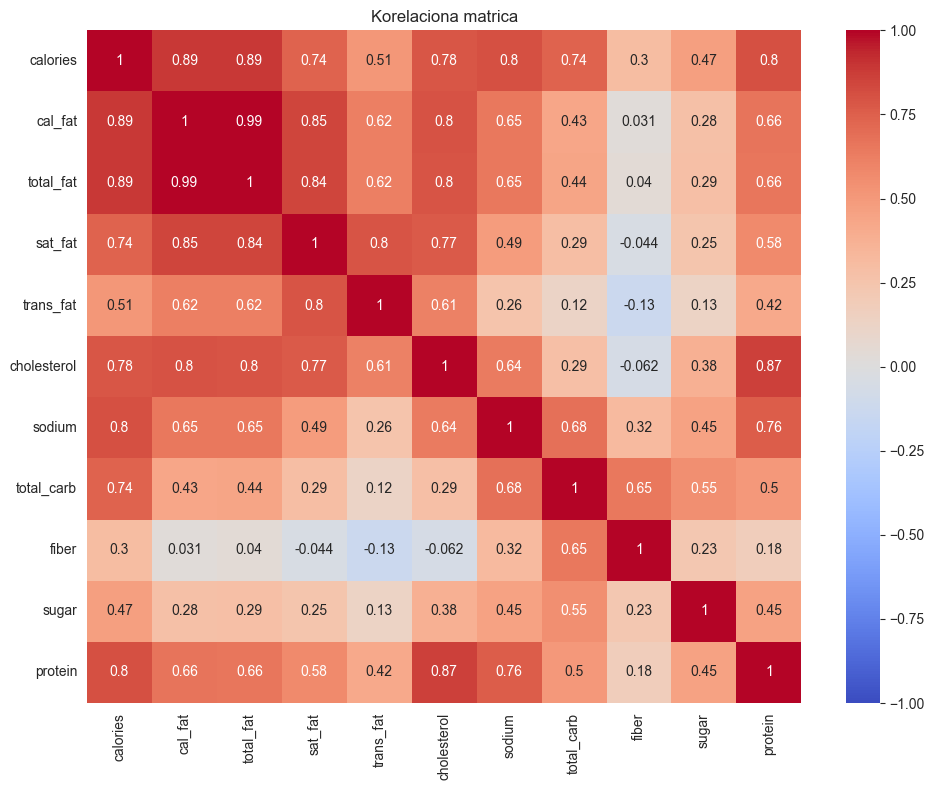

In [12]:
#forming correlation matrix 
import matplotlib.pyplot as plt
import seaborn as sb

corr_matrix = data_numeric.corr(numeric_only=True).round(2)
plt.figure(figsize=(10, 8))
sb.heatmap(data_numeric.corr(numeric_only=True), annot=True,
           cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korelaciona matrica")
plt.tight_layout()
plt.show()

In [13]:
#deciding variables for prediction
target = 'protein'
features = ['cholesterol','calories','sodium']
# raising 1 unit of cholesterol protein increases by 0.87
# raising 1 unit of  calories protein increases by 0.8
# raising 1 unit of sodium protein increases by 0.76

In [14]:
#making train_df, test_df , lm model ,y_true , y_pred, and interpreting the results of prediction 
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
train_df, test_df = train_test_split(data_numeric,test_size = 0.2,random_state=123)
lm1 = smf.ols(formula=f'{target}~'+'+'.join(features),data=train_df).fit()
y_true = test_df[target]
X_test = test_df[features]
y_pred = lm1.predict(X_test)
results = pd.DataFrame({'target':y_true,'y_pred':y_pred})
results.head()

,target,y_pred
34,28.0,23.891304
202,22.0,21.010936
86,15.0,15.677141
276,13.0,18.341021
36,58.0,46.539851


In [15]:
#model summary
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                protein   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     598.7
Date:                Tue, 23 Dec 2025   Prob (F-statistic):          1.25e-148
Time:                        14:19:09   Log-Likelihood:                -1374.2
No. Observations:                 410   AIC:                             2756.
Df Residuals:                     406   BIC:                             2773.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.7467      0.774      3.551      0.000       1.226       4.267
cholesterol     0.1734      0.010     16.576      0.000       0.153       0.194
calories        0.0066      0.003      2.533      0.012       0.001       0.012
sodium          0.0072      0.001      8.549      0.000       0.006       0.009
==============================================================================
Omnibus:                      214.420   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5990.448
Skew:                          -1.638   Prob(JB):                         0.00
Kurtosis:                      21.437   Cond. No.                     3.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#Residuals represent the difference between the observed and the predicted values of the output variable (protein)
#R-squared is 0.816, which means our model explains 81.6% of the variability in the target variable
#The F-statistic is 598.7 and its p-value is small, which means our model is statistically significant
#The intercept is 2.7467, which means that when the values of the input variables (cholesterol, etc.) are 0, the value of the output variable (protein) is 2.7467
#Coefficients:
#For an increase of 1 unit in cholesterol, protein increases by 0.1734
#For an increase of 1 unit in calories, protein increases by 0.0066
#For an increase of 1 unit in sodium, protein increases by 0.0072
#Statistical significance of variables for prediction: p < 0.001 for cholesterol and sodium, which means they are highly significant predictors
#While for calories, p = 0.012 < 0.05, it is also significant for prediction
#The condition number is large (3.46e+03), which means there may be multicollinearity


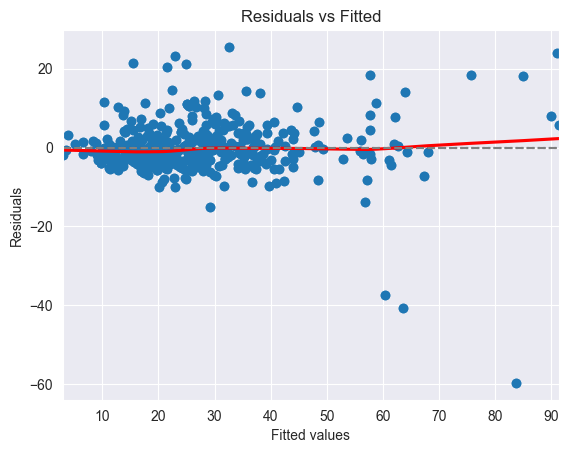

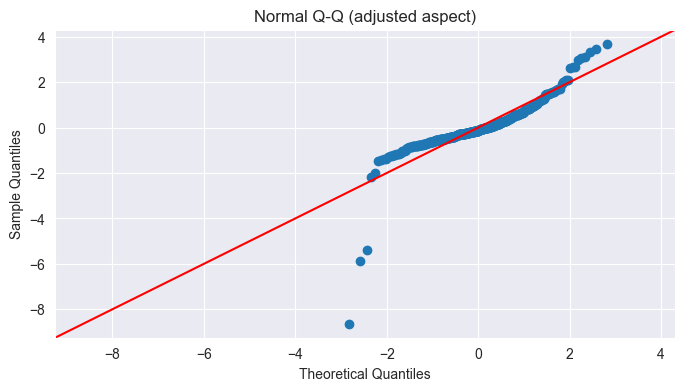

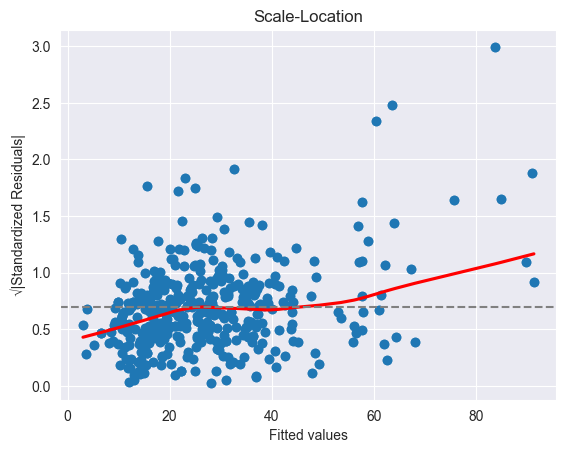

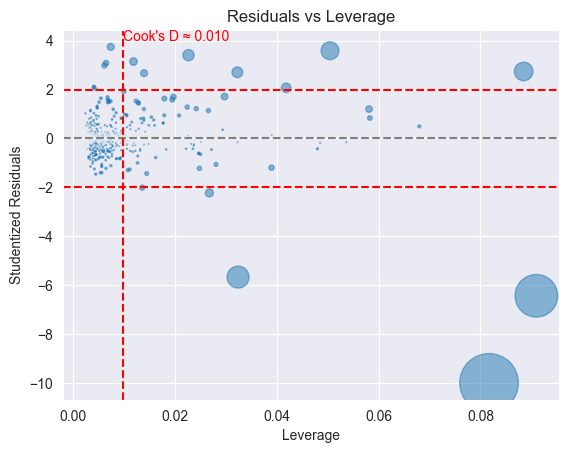

In [17]:
# Graphs for diagnostic of LinearRegression model
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
# Residuals vs Fitted
sb.residplot(x = lm1.fittedvalues,y = lm1.resid,lowess=True,line_kws={'color':'red'})
plt.scatter(lm1.fittedvalues, lm1.resid)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()
# Normal Q-Q 
sm.qqplot(lm1.resid, line='45', fit=True)
plt.gcf().set_size_inches(8, 4)
plt.title("Normal Q-Q (adjusted aspect)")
plt.show()
# Scale-Location
influence = lm1.get_influence()
std_resid = influence.resid_studentized_internal
abs_sqrt_resid = np.sqrt(np.abs(std_resid))
sb.regplot(x = lm1.fittedvalues,y = abs_sqrt_resid,lowess=True,line_kws={'color':'red'})
plt.scatter(lm1.fittedvalues, abs_sqrt_resid)
plt.axhline(np.mean(abs_sqrt_resid), color='gray', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("√|Standardized Residuals|")
plt.title("Scale-Location")
plt.show()
# Residuals vs Leverage + Cook's D threshold
leverage = influence.hat_matrix_diag
stud_resid = influence.resid_studentized_external
cooks_d = influence.cooks_distance[0]
n = len(lm1.model.endog)
thresh = 4 / n

plt.scatter(leverage, stud_resid, s=1000 * cooks_d, alpha=0.5)
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(2, color='red', linestyle='--')
plt.axhline(-2, color='red', linestyle='--')
plt.axvline(thresh, color='red', linestyle='--')
plt.text(thresh, plt.ylim()[1]*0.9, f"Cook's D ≈ {thresh:.3f}", color='red')
plt.xlabel("Leverage")
plt.ylabel("Studentized Residuals")
plt.title("Residuals vs Leverage")
plt.show()

In [18]:
#Residuals vs Fitted shows the distribution of residuals, i.e., the difference between the observed and predicted values, in relation to the fitted values. The question is whether the linearity assumption is satisfied: if it were, the points would be evenly scattered around the horizontal axis (note: if it formed a perfectly straight line, that would indicate the model is not adequate). In our case, the line is slightly curved, which suggests nonlinearity.
#Normal Q–Q (widen the plot so the line looks less steep) This plot checks the assumption that the residuals are normally distributed. Ideally, all points would lie along the line, but since that is not the case here, it means the residuals are not normally distributed.
#Scale-Location asks whether the variability of the residuals is constant across the range of predictions. Ideally, the line would be perfectly horizontal (constant), indicating homoscedasticity. In our model, we have heteroscedasticity, as the line is slightly tilted.
#Residuals vs Leverage + Cook’s D threshold shows the distance/influence of observations in relation to Cook’s distance. It examines whether there are extreme values that affect the stability of the model (outliers). In our case, we can see that there are a few, which means they do affect the model’s stability.




In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Preparing X: all predictors(features) from train_df + const.
X = sm.add_constant(train_df[features])
# Calculating VIF for each feature i and doing - √VIF  > 2 - potential colinearity 
print((pd.Series([vif(X.values, i) for i in range(X.shape[1])],
                 index=X.columns) ** 0.5).sort_values(ascending=False))

const          2.255865
calories       2.069238
sodium         1.673344
cholesterol    1.623138
dtype: float64


In [20]:
#sqrt(VIF) for calories > 2 , so we drop calories to increase the models performance
lm2 = smf.ols(formula=f'protein~sodium+cholesterol',data=train_df).fit()
X = sm.add_constant(train_df[['sodium','cholesterol']])
print("√VIF sa svim prediktorima:")
print((pd.Series([vif(X.values, i) for i in range(X.shape[1])],
                 index=X.columns) ** 0.5).sort_values(ascending=False))

√VIF sa svim prediktorima:
const          2.097196
sodium         1.311350
cholesterol    1.311350
dtype: float64
